In [1]:
import numpy as np
#サイキットラーン　（メモリの節約のため、sklearnの中からsvmのみをインポートする
from sklearn import svm
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# 予測結果の精度確認（ROC曲線の描画）
from sklearn.metrics import roc_auc_score, roc_curve
# 予測結果の精度表示
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


## 訓練データの読み込み

In [2]:
# CSVファイル読み込み（訓練データ）
df_train = pd.read_csv('train.csv')
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [3]:
# 性別を変換する（訓練データ）
df_train["Gender"] = df_train["Gender"].apply(lambda x: 1 if x=="Male" else 0)
df_train.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,1,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,1,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,1,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,1,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,0,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


## 評価データの読み込み

In [4]:
# CSVファイル読み込み（評価データ）
df_vat = pd.read_csv('test.csv')
df_vat.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,Male,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,Female,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,Male,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,Male,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,Female,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


In [5]:
# 性別を変換する（評価データ）
df_vat["Gender"] = df_vat["Gender"].apply(lambda x: 1 if x=="Male" else 0)
df_vat.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,25,1,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006
1,26,0,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562
2,64,1,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579
3,65,1,0.834003,0.175741,200.901130,12.820356,20.102517,6.829109,3.626758,1.275070
4,34,0,0.690296,0.135503,208.705835,20.279018,25.096685,8.663530,4.170750,1.280078


## 訓練

In [6]:
def xConv(x_tmp,):
    # T_Bil、D_Bilの変換
    bins1 = [0, 0.6,  0.7, 0.75, 0.8, 0.9, 1.0, 1.2, 1.3, 1.4, 1.5, 1.8, 100]
    bins2 = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.8, 100]
    x_tmp=comCutCnnect(x_tmp, bins1, 'T_Bil' , bins2, 'D_Bil' )
    
    # T_Bil、D_Bilの変換
    bins1 = [0, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 50, 100, 125,1500]
    bins2 = [0, 20, 25,  30, 35,  40, 50, 60, 70, 80, 100, 140, 180,900]
    x_tmp=comCutCnnect(x_tmp, bins1, 'ALT_GPT' , bins2, 'AST_GOT' )
       
    return x_tmp


def comCutCnnect(x_tmp,bins1 ,col1, bins2 ,col2 ):   
    X_cut_1 = pd.cut(x_tmp[col1], bins=bins1, labels=False)
    X_cut_2 = pd.cut(x_tmp[col2], bins=bins2, labels=False)
    X_cut = pd.DataFrame(np.array(X_cut_1) * np.array(X_cut_2) , columns={col1})
    x_tmp.drop(columns=[col1 , col2], inplace=True, axis=1)
    x_tmp = pd.concat([x_tmp, X_cut], axis=1)
    return x_tmp

   

In [7]:
# 説明変数（訓練データ）
x_tmp=df_train.loc[:,['Age', 'Gender', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb','AG_ratio']]
x_tmp=xConv(x_tmp)
x_train = np.array(x_tmp)
print(x_tmp.head())
# 目的変数（訓練データ）
y_train = np.array(df_train.loc[:,['disease']])


# 説明変数（評価データ）
x_tmp=df_vat
x_tmp=xConv(x_tmp)
print(x_tmp.head())
x_vat = np.array(x_tmp)

   Age  Gender         ALP        TP       Alb  AG_ratio  T_Bil  ALT_GPT
0   59       1  220.178691  6.815731  3.112276  1.006802      9        4
1   69       1  221.218413  6.889608  3.051521  0.751346     18       70
2   65       1  320.770533  5.947767  2.489167  0.774952      1       12
3   65       1  369.278160  6.967183  3.613837  0.988155     20       54
4   22       0  222.782025  5.837537  3.068697  1.026654     30       77
   Age  Gender         ALP        TP       Alb  AG_ratio  T_Bil  ALT_GPT
0   25       1  214.448679  6.817903  3.600752  1.288006     12        0
1   26       0  234.136816  6.795433  3.111043  1.030562      8        0
2   64       1  216.039909  7.524030  3.627621  1.278579      9        4
3   65       1  200.901130  6.829109  3.626758  1.275070     12        4
4   34       0  208.705835  8.663530  4.170750  1.280078      2       14


In [8]:
y = np.zeros((len(y_train), 1 + y_train.max()), dtype=int)
y[np.arange(len(y_train)), y_train.T] = 1
print(y)

[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [1 0]
 [1 0]]


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train, y_train, test_size=0.25, random_state=1) 

In [10]:
# サポートベクターマシーン
clf = svm.SVC()  
# 訓練
clf.fit(X_train, Y_train)  

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

## 検証データを使って予測値の検証

In [11]:
# 検証 <-訓練データ 
clf.score(X_train ,Y_train)

0.8053375196232339

In [12]:
# 検証 <-検証データ
# (検証データと値が近いなら信用できる。
#  どこまでの差異を近いとするかはそれぞれ
#  判断する必要がある。)
clf.score(X_test,Y_test)

0.8075117370892019

## ROC曲線の描画（偽陽性率、真陽性率、閾値の算出）

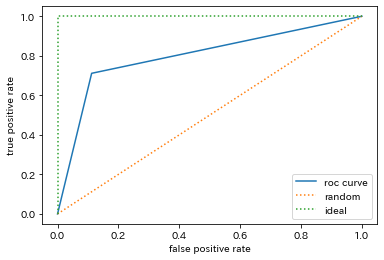

In [19]:
y_pred = clf.predict(X_test)  

fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_pred)
plt.plot(fpr, tpr, label='roc curve')
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [14]:
# AUCスコアの算出
auc_score = roc_auc_score(y_true=Y_train, y_score=y_pred)
print("AUC:", auc_score)

AUC: 0.7891059218681276


## 予測する

In [15]:
y_predict = clf.predict(x_vat)       
df_out = pd.DataFrame(y_predict, columns=['val'])
df_out.to_csv('./submit.csv', encoding='utf_8_sig' , header=False)

In [16]:
from collections import Counter
print(Counter(y_predict))

Counter({0: 239, 1: 111})


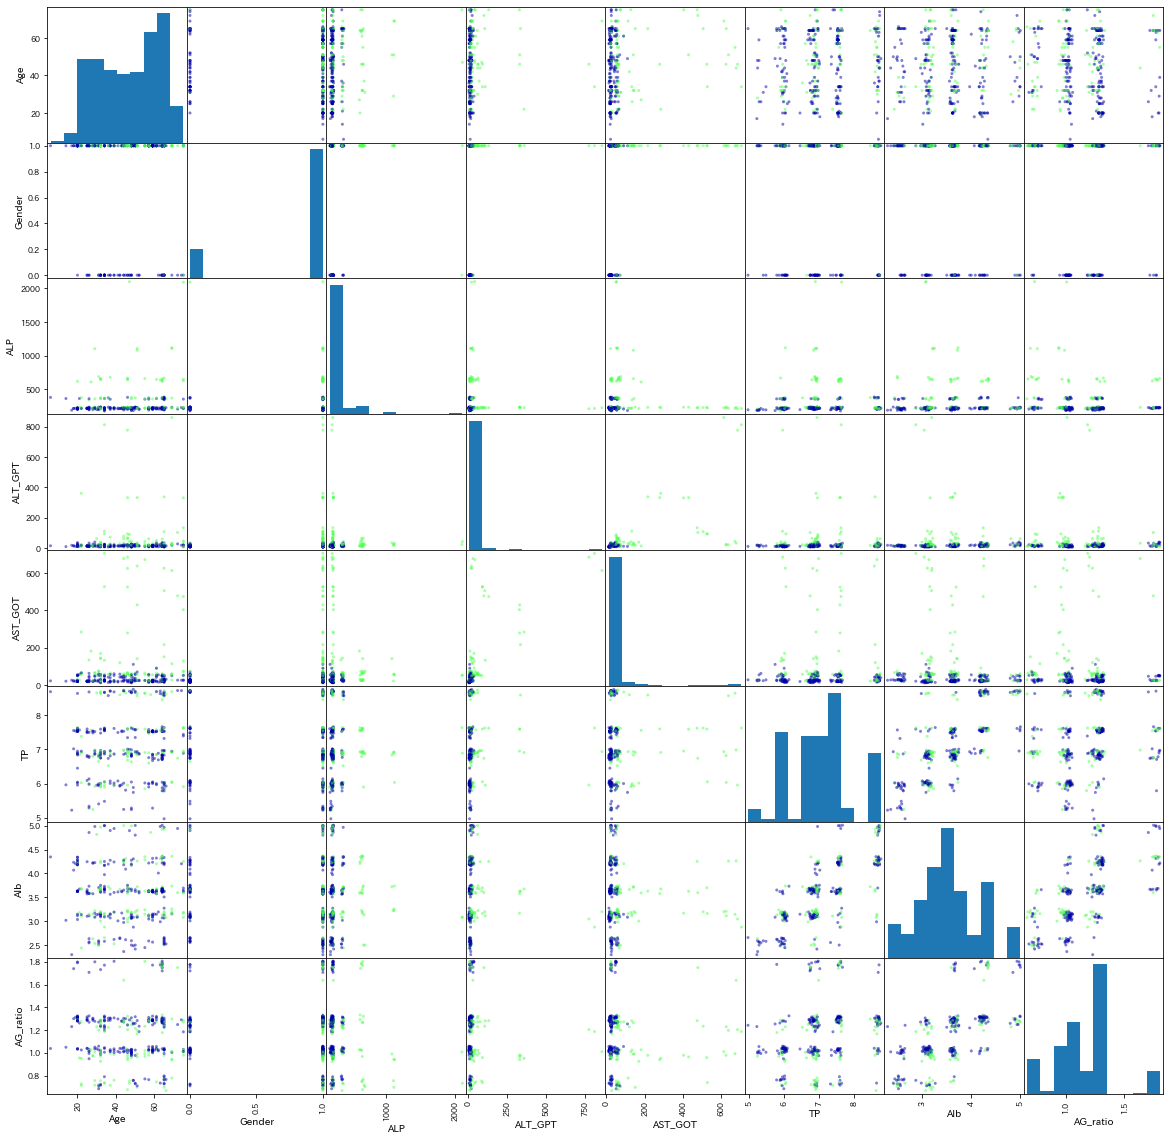

In [17]:
# DataFrameからscatter_matrixを作成
from pandas.plotting import scatter_matrix
import mglearn
grr = scatter_matrix(df_vat, c=y_predict,  figsize=(20, 20) , cmap=mglearn.cm3)
plt.show()

## モデルの保存

In [18]:
import pickle
with open('model.pickle', mode='wb') as fp:
    pickle.dump(clf, fp)